In [7]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, geopandas as gpd, plotly.express as px, json
from urllib.request import urlopen

sns.set_style("darkgrid")
plt.style.use('ggplot')

In [8]:
sales = pd.read_excel(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\src\Datasets\supermarkt_sales.xlsx", engine='openpyxl', usecols='B:R', skiprows=3)

sales.head()

Invoice ID Branch       City Customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2021-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2021-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2021-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2021-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2021-02-08   

       Time      Payment    cogs  gross margin percentage  gross income  \
0  13:08:00      Ewallet  522.83                 4.761905       26.1415   
1  10:29:00         Cash   76.40                 4.761905        3.8200   
2  13:23:00  Credit card  324.31                 4.761905       16.2155   
3  20:33:00      Ewallet  465.76                 4.761905       23.2880   
4  10:37:00      Ewallet  604.17                 4.761905       30.2085   

   Rating  
0     9.1  
1     9.6  
2     7.4  
3     8.4  
4     5.3

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer_type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [10]:
sales['Time'] = pd.to_datetime(sales['Time'], format='%H:%M:%S').dt.hour

sales.head()

Invoice ID Branch       City Customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2021-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2021-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2021-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2021-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2021-02-08   

   Time      Payment    cogs  gross margin percentage  gross income  Rating  
0    13      Ewallet  522.83                 4.761905       26.1415     9.1  
1    10         Cash   76.40                 4.761905        3.8200     9.6  
2    13  Credit card  324.31                 4.761905       16.2155     7.4  
3    20      Ewallet  465.76                 4.761905       23.2880     8.4  
4    10      Ewallet  604.17                 4.761905       30.2085     5.3

# **`Nulls`**

In [11]:
print("Null percentage per Column.")

for i in sales.columns:
    print(f"{i} : {sales[sales[i].isnull()].shape[0] / sales.shape[0] * 100}%")

Null percentage per Column.
Invoice ID : 0.0%
Branch : 0.0%
City : 0.0%
Customer_type : 0.0%
Gender : 0.0%
Product line : 0.0%
Unit price : 0.0%
Quantity : 0.0%
Tax 5% : 0.0%
Total : 0.0%
Date : 0.0%
Time : 0.0%
Payment : 0.0%
cogs : 0.0%
gross margin percentage : 0.0%
gross income : 0.0%
Rating : 0.0%


Observations:
- The whole dataframe is complete.

# **`Duplicates`**

In [12]:
sales[sales.duplicated(subset="Invoice ID")]

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer_type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

Observations:
- Any of the rows is duplicated.

# **`Analysis`**

### **`Total Sales`**

In [13]:
print(f"USD ${sales['Total'].sum():,.2f}")

USD $322,966.75


### **`Average Sales per Transaction`**

In [14]:
print(f"USD ${sales['Total'].mean():,.2f}")

USD $322.97


### **`Sales by Branches`**

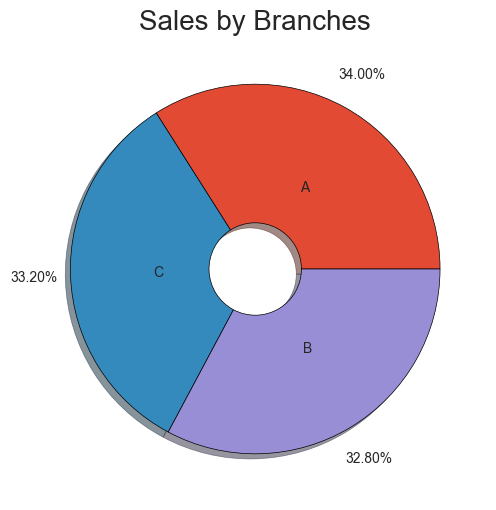

In [15]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Branch'].value_counts(),
    autopct='%.2f%%',
    pctdistance=1.2,
    labels=sales['Branch'].unique(),
    labeldistance=0.5,
    wedgeprops=dict(width=0.75, edgecolor='black'),
    shadow=True
)

plt.title("Sales by Branches", fontsize=20)
plt.show()

### **`Sales by City`**

In [30]:
myanmar = gpd.read_file(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\src\Datasets\state_region.geojson")

px.choropleth(
    geojson=myanmar,
    scope='asia'
)

In [98]:
myanmar = gpd.read_file(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos\Sales-Dashboard-Streamlit\src\Datasets\state_region.geojson")

myanmar

OBJECTID_1  OBJECTID            ST ST_PCODE   ST_RG  \
0            1       1.0    Ayeyarwady   MMR017  Region   
1            2       2.0   Bago (East)   MMR007  Region   
2            3       3.0   Bago (West)   MMR008  Region   
3            4       4.0          Chin   MMR004   State   
4            5       5.0        Kachin   MMR001   State   
5            6       6.0         Kayah   MMR002   State   
6            7       7.0         Kayin   MMR003   State   
7            8       8.0        Magway   MMR009  Region   
8            9       9.0      Mandalay   MMR010  Region   
9           10      10.0           Mon   MMR011   State   
10          11      11.0   Nay Pyi Taw   MMR018  Region   
11          12      12.0       Rakhine   MMR012   State   
12          13      13.0       Sagaing   MMR005  Region   
13          14      14.0   Shan (East)   MMR016   State   
14          15      15.0  Shan (North)   MMR015   State   
15          16      16.0  Shan (South)   MMR014   State   
16          17      17.0   Tanintharyi   MMR006  Region   
17          18      18.0        Yangon   MMR013  Region   

                       NAME_WIN                      NAME_M3  Shape_Leng  \
0           {&m0wDwdkif;a'oBuD;          ဧရာဝတီတိုင်းဒေသကြီး   29.906058   
1    yJcl;wdkif;a'oBuD; (ta&Sh)   ပဲခူးတိုင်းဒေသကြီး (အရှေ့)   10.890121   
2   yJcl;wdkif;a'oBuD; (taemuf)  ပဲခူးတိုင်းဒေသကြီး (အနောက်)    7.829050   
3                  csif;jynfe,f                 ချင်းပြည်နယ်   12.829134   
4                  ucsifjynfe,f                 ကချင်ပြည်နယ်   20.856693   
5                   u,m;jynfe,f                  ကယားပြည်နယ်    5.883621   
6                   u&ifjynfe,f                  ကရင်ပြည်နယ်   17.396099   
7            rauG;wdkif;a'oBuD;           မကွေးတိုင်းဒေသကြီး   14.543904   
8           rEÅav;wdkif;a'oBuD;         မန္တလေးတိုင်းဒေသကြီး   15.167472   
9                   rGefjynfe,f                  မွန်ပြည်နယ်   13.677732   
10                   aejynfawmf                   နေပြည်တော်    4.823193   
11                &cdkifjynfe,f                ရခိုင်ပြည်နယ်   46.924918   
12       ppfudkif;wdkif;a'oBuD;       စစ်ကိုင်းတိုင်းဒေသကြီး   23.421767   
13         &Srf;jynfe,f (ta&Sh)         ရှမ်းပြည်နယ် (အရှေ့)   12.451263   
14        &Srf;jynfe,f (ajrmuf)        ရှမ်းပြည်နယ် (မြောက်)   17.108030   
15         &Srf;jynfe,f (awmif)         ရှမ်းပြည်နယ် (တောင်)   14.899171   
16         weoFm&Dwdkif;a'oBuD;       တနင်္သာရီတိုင်းဒေသကြီး   60.844166   
17         &efukefwdkif;a'oBuD;         ရန်ကုန်တိုင်းဒေသကြီး    8.076426   

    Shape_Area                                           geometry  
0     2.848039  MULTIPOLYGON (((95.27339 15.67789, 95.27517 15...  
1     2.043537  POLYGON ((96.17964 19.49327, 96.18219 19.49257...  
2     1.272745  POLYGON ((95.71362 19.18921, 95.71458 19.1874,...  
3     3.154052  POLYGON ((93.36931 24.09112, 93.38098 24.08726...  
4     8.028544  POLYGON ((97.59674 28.52616, 97.5925 28.52078,...  
5     1.010500  POLYGON ((97.1759 19.99273, 97.17782 19.9923, ...  
6     2.576703  MULTIPOLYGON (((97.71314 16.56484, 97.7001 16....  
7     3.883304  POLYGON ((94.11699 22.76258, 94.1174 22.75726,...  
8     2.698309  POLYGON ((96.14023 23.61329, 96.13761 23.59751...  
9     0.951069  MULTIPOLYGON (((97.73585 15.05998, 97.73291 15...  
10    0.608735  POLYGON ((96.31371 20.31502, 96.32074 20.31463...  
11    2.996753  MULTIPOLYGON (((94.3715 18.34691, 94.36896 18....  
12    8.320111  POLYGON ((96.72824 27.36026, 96.74595 27.35724...  
13    3.222148  POLYGON ((99.23387 22.11648, 99.24861 22.11304...  
14    5.390568  POLYGON ((96.66869 24.14981, 96.66784 24.14561...  
15    4.982796  POLYGON ((96.96958 22.26812, 96.97358 22.26669...  
16    3.420185  MULTIPOLYGON (((97.90662 9.67171, 97.90625 9.6...  
17    0.830424  MULTIPOLYGON (((93.36715 14.04492, 93.36257 14...

In [66]:
myanmar['ST'].unique()

array(['Ayeyarwady', 'Bago (East)', 'Bago (West)', 'Chin', 'Kachin',
       'Kayah', 'Kayin', 'Magway', 'Mandalay', 'Mon', 'Nay Pyi Taw',
       'Rakhine', 'Sagaing', 'Shan (East)', 'Shan (North)',
       'Shan (South)', 'Tanintharyi', 'Yangon'], dtype=object)

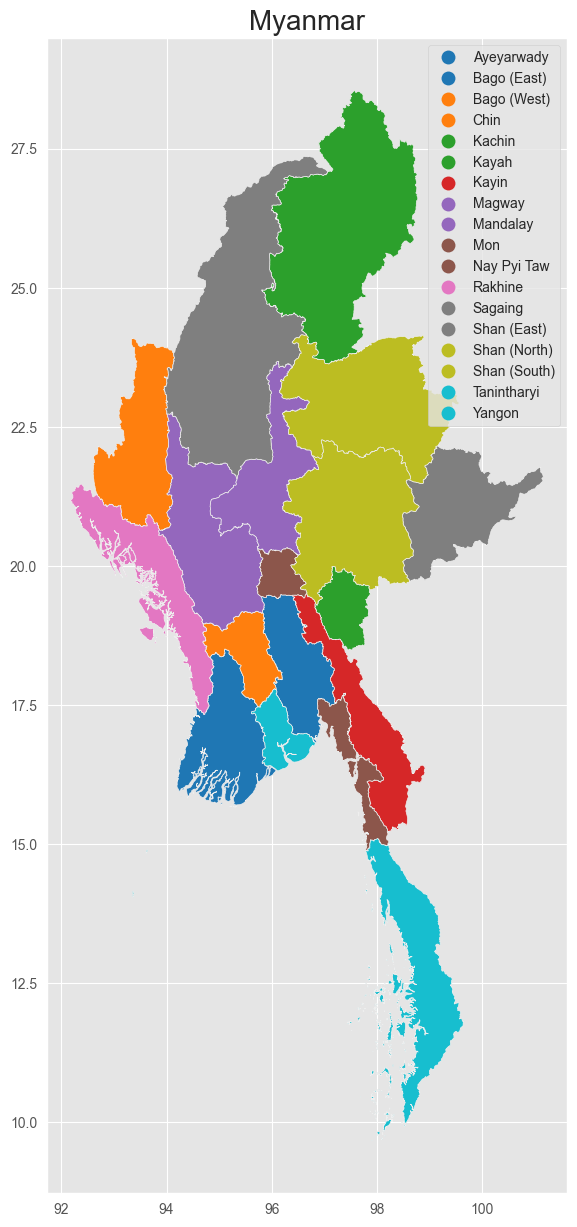

In [95]:
myanmar.plot('ST', legend=True, figsize=(15,15))

plt.title("Myanmar", fontsize=20)
plt.show()

### **`Sales by Customer Type`**

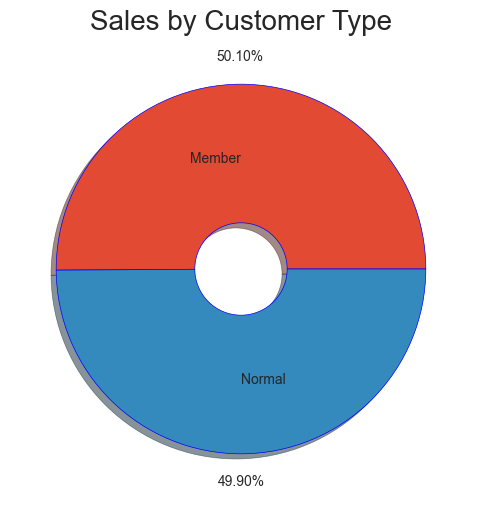

In [78]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Customer_type'].value_counts(),
    labels=sales['Customer_type'].unique(),
    labeldistance=0.6,
    autopct="%.2f%%",
    pctdistance=1.15,
    shadow=True,
    wedgeprops=dict(width=0.75, edgecolor='b')
)

plt.title("Sales by Customer Type", fontsize=20)
plt.show()

### **`Sales by Gender`**

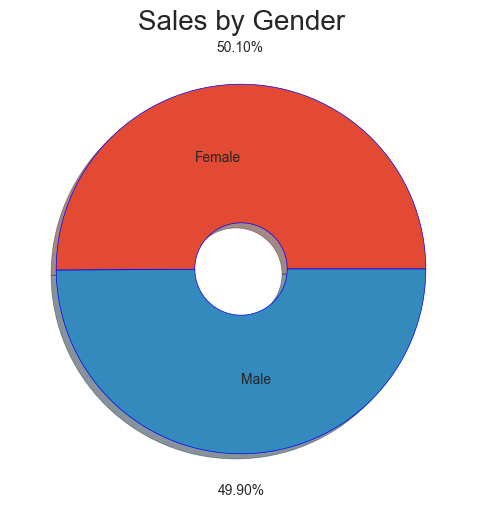

In [79]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Gender'].value_counts(),
    labels=sales["Gender"].unique(),
    autopct="%.2f%%",
    pctdistance=1.2,
    shadow=True,
    labeldistance=0.6,
    wedgeprops=dict(width=0.75, edgecolor='b')
)

plt.title("Sales by Gender", fontsize=20)
plt.show()

### **`Sales by Product Line`**

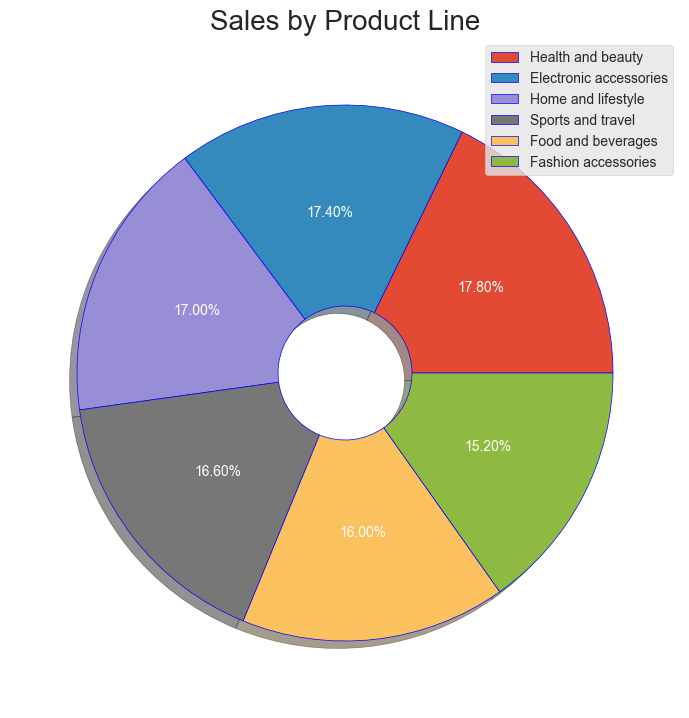

In [123]:
plt.figure(figsize=(10,7))

plt.pie(
    x=sales['Product line'].value_counts(),
    autopct="%.2f%%",
    pctdistance=0.6,
    shadow=True,
    wedgeprops=dict(width=0.75, edgecolor='b'),
    textprops=dict(color='w',)
)

plt.legend(sales['Product line'].unique())
plt.tight_layout()
plt.title("Sales by Product Line", fontsize=20)
plt.show()

### **`Distribution of the Sales by Unit Price`**

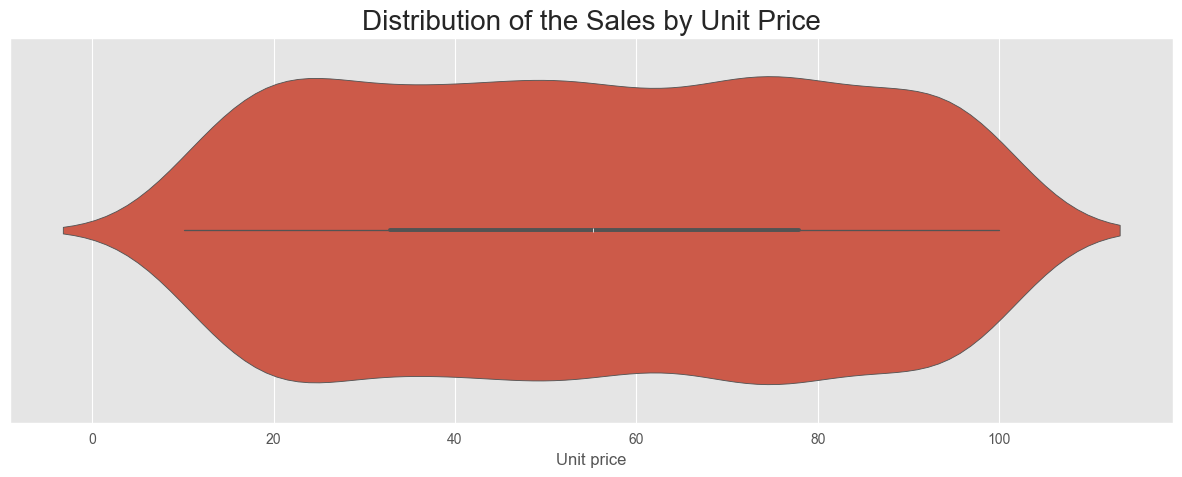

In [132]:
plt.figure(figsize=(15,5))

sns.violinplot(
    x=sales['Unit price']
)

plt.title("Distribution of the Sales by Unit Price", fontsize=20)
plt.show()

### **`Distribution of the Sales by Quantity`**

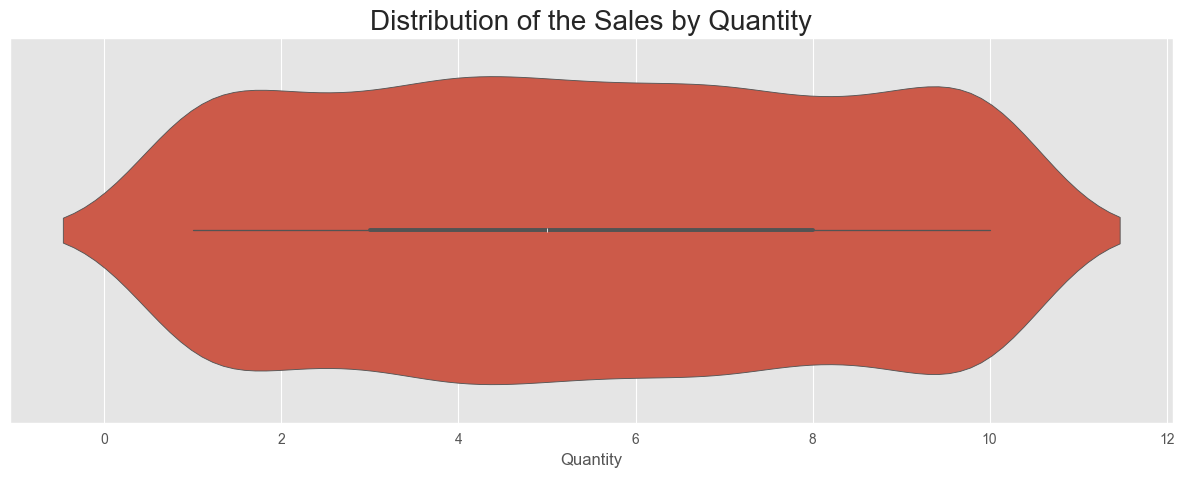

In [131]:
plt.figure(figsize=(15,5))

sns.violinplot(
    x=sales['Quantity']
)

plt.title("Distribution of the Sales by Quantity", fontsize=20)
plt.show()

### **`Total Sales by Date`**

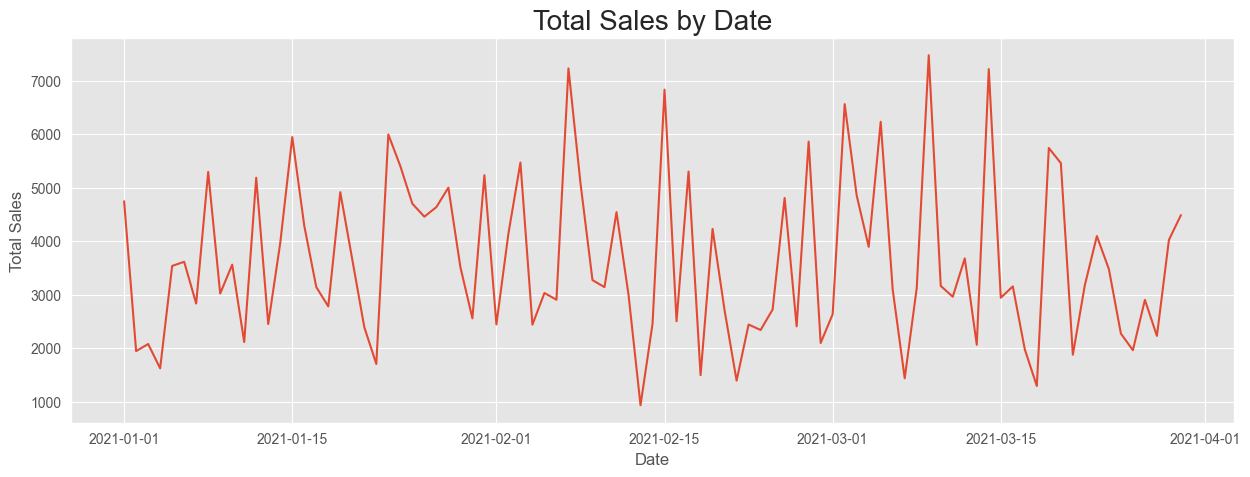

In [141]:
plt.figure(figsize=(15,5))

sns.lineplot(
    data=sales.groupby(by='Date')['Total'].sum()
)

plt.title("Total Sales by Date", fontsize=20)
plt.ylabel("Total Sales")
plt.show()

### **`Sales by Hour`**

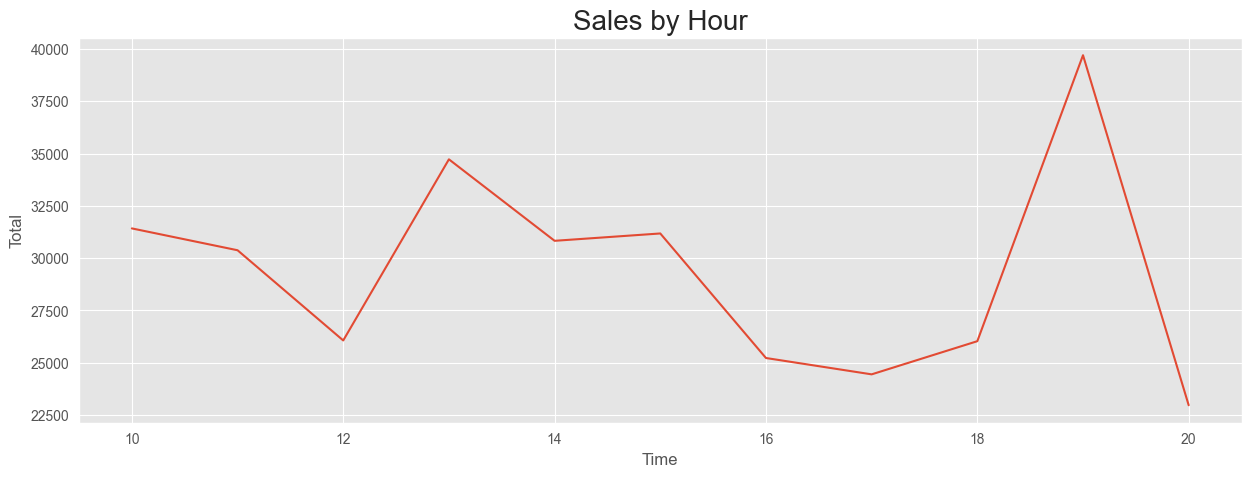

In [148]:
plt.figure(figsize=(15,5))

sns.lineplot(
    data=sales.groupby(by='Time')['Total'].sum()
)

plt.title("Sales by Hour", fontsize=20)
plt.ylabel("Total")
plt.show()

### **`Sales by Payment`**

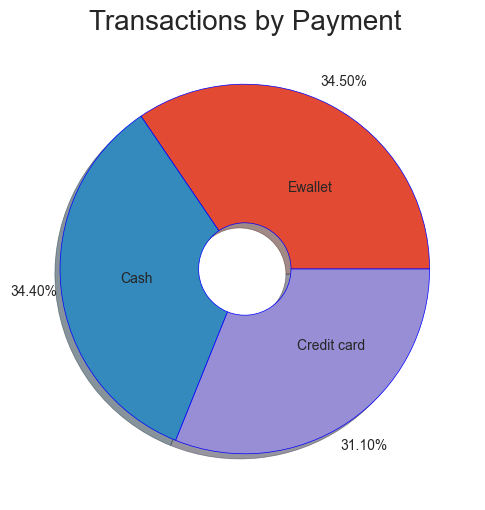

In [151]:
plt.figure(figsize=(6,6))

plt.pie(
    x=sales['Payment'].value_counts(),
    labels=sales['Payment'].unique(),
    autopct="%.2f%%",
    pctdistance=1.15,
    shadow=True,
    labeldistance=0.5,
    wedgeprops=dict(width=0.75, edgecolor='b')
)

plt.title("Transactions by Payment", fontsize=20)
plt.show()

In [70]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')